# Praktikum 2

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from scipy.signal import find_peaks, filtfilt, butter


Aufgabe 1: Erstellen Sie ein Diagramm, in dem das kabellose Messystem dargestellt wird. Beschriften Sie dabei jede Komponente und beschrieben Sie diese kurz    

C:\Users\tbirg\AppData\Local\Temp\ipykernel_28276\3303116431.py:42: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((x - width / 2, y - height / 2), width, height, color=color, edgecolor="black", zorder=2)


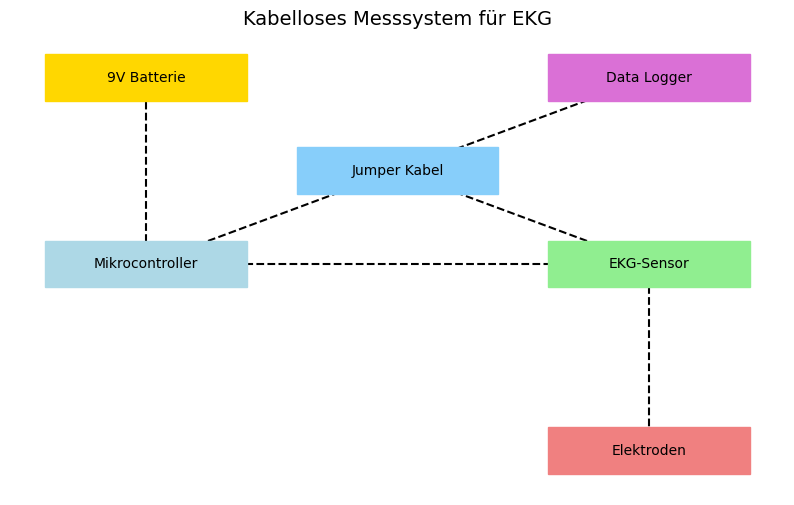

Kurzbeschreibung der Komponenten:
- Mikrocontroller: Steuerung und Datenverarbeitung
- EKG-Sensor: Erfassung elektrischer Signale des Herzens
- Elektroden: Messpunkte für das EKG-Signal
- 9V Batterie: Stromversorgung für das mobile System
- Data Logger: Speicherung der Messdaten auf microSD
- Jumper Kabel: Verbindung der Komponenten


In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Komponenten des kabellosen Messsystems
components = [
    {"name": "Mikrocontroller", "desc": "Steuerung und Datenverarbeitung", "color": "lightblue"},
    {"name": "EKG-Sensor", "desc": "Erfassung elektrischer Signale des Herzens", "color": "lightgreen"},
    {"name": "Elektroden", "desc": "Messpunkte für das EKG-Signal", "color": "lightcoral"},
    {"name": "9V Batterie", "desc": "Stromversorgung für das mobile System", "color": "gold"},
    {"name": "Data Logger", "desc": "Speicherung der Messdaten auf microSD", "color": "orchid"},
    {"name": "Jumper Kabel", "desc": "Verbindung der Komponenten", "color": "lightskyblue"},
]

# Positionen der Komponenten im Diagramm
positions = {
    "Mikrocontroller": (0, 0),
    "EKG-Sensor": (2, 0),
    "Elektroden": (2, -2),
    "9V Batterie": (0, 2),
    "Data Logger": (2, 2),
    "Jumper Kabel": (1, 1),
}

# Verbindungen zwischen den Komponenten
connections = [
    ("Mikrocontroller", "EKG-Sensor"),
    ("EKG-Sensor", "Elektroden"),
    ("Mikrocontroller", "9V Batterie"),
    ("Mikrocontroller", "Data Logger"),
    ("EKG-Sensor", "Jumper Kabel"),
]

# Diagramm erstellen
fig, ax = plt.subplots(figsize=(10, 6))

# Rechtecke für Komponenten zeichnen
width, height = 0.8, 0.5  # Breite und Höhe der Rechtecke
for comp in components:
    name = comp["name"]
    color = comp["color"]
    x, y = positions[name]
    rect = patches.Rectangle((x - width / 2, y - height / 2), width, height, color=color, edgecolor="black", zorder=2)
    ax.add_patch(rect)
    ax.text(x, y, name, ha="center", va="center", fontsize=10, zorder=3)

# Verbindungen einzeichnen
for comp1, comp2 in connections:
    x1, y1 = positions[comp1]
    x2, y2 = positions[comp2]
    ax.plot([x1, x2], [y1, y2], "k--", zorder=1)

# Diagramm anpassen
ax.set_title("Kabelloses Messsystem für EKG", fontsize=14)
ax.axis("off")
plt.show()

# Beschreibung der Komponenten
print("Kurzbeschreibung der Komponenten:")
for comp in components:
    print(f"- {comp['name']}: {comp['desc']}")


Aufgabe 2: Beschreiben sie was im seriellen Plotter zu erkennen ist, wenn sie ihre Messdaten aufnehmen und der Laptop dabei nicht am Stromnetz angeschlossen ist. Was passiert wenn sie mit beiden Händen an das Metallgehäuse des  laptops greifen und der Laptop am Stromnetz angeschlossen is?

Antwort: 
- **Laptop nicht am Stromnetz:** 
  Das EKG-Signal ist im seriellen Plotter meist sauber und zeigt typische Herzsignale (P-Wellen, QRS-Komplexe, T-Wellen) ohne größere Störungen, da kein Netzfrequenz-Rauschen (50 Hz) vorliegt.

- **Laptop am Stromnetz und Berührung des Metallgehäuses:** 
  Es treten deutliche Störungen auf, verursacht durch Netzfrequenz-Artefakte. Diese entstehen durch Ableitströme, die über den Körper fließen, und überlagern das Signal.

**Ergebnis:** Batteriebetrieb liefert störungsfreiere Messdaten, während Netzbetrieb mit Berührung des Laptops Artefakte erzeugt.

Aufgabe 3: Führen Sie Aufgabe 1 Teil 4: Experiment in Ruhe für jeden Teilnehmer Ihrer Gruppe aus und plotten Sie etwas 5 Sekunden der gefilterten Daten.
 Markieren Sie für einen Teilnehmer die P-Welle, den QRS-Komplex und die T-Welle im Plot. Beschreiben Sie das physiologische Phänomen, welches für die jeweiligen elektrischen Signale des EKGs verantwortlich ist.

## Experiment in Ruhe
Plot der gefilterten Daten jedes Teilnehmers

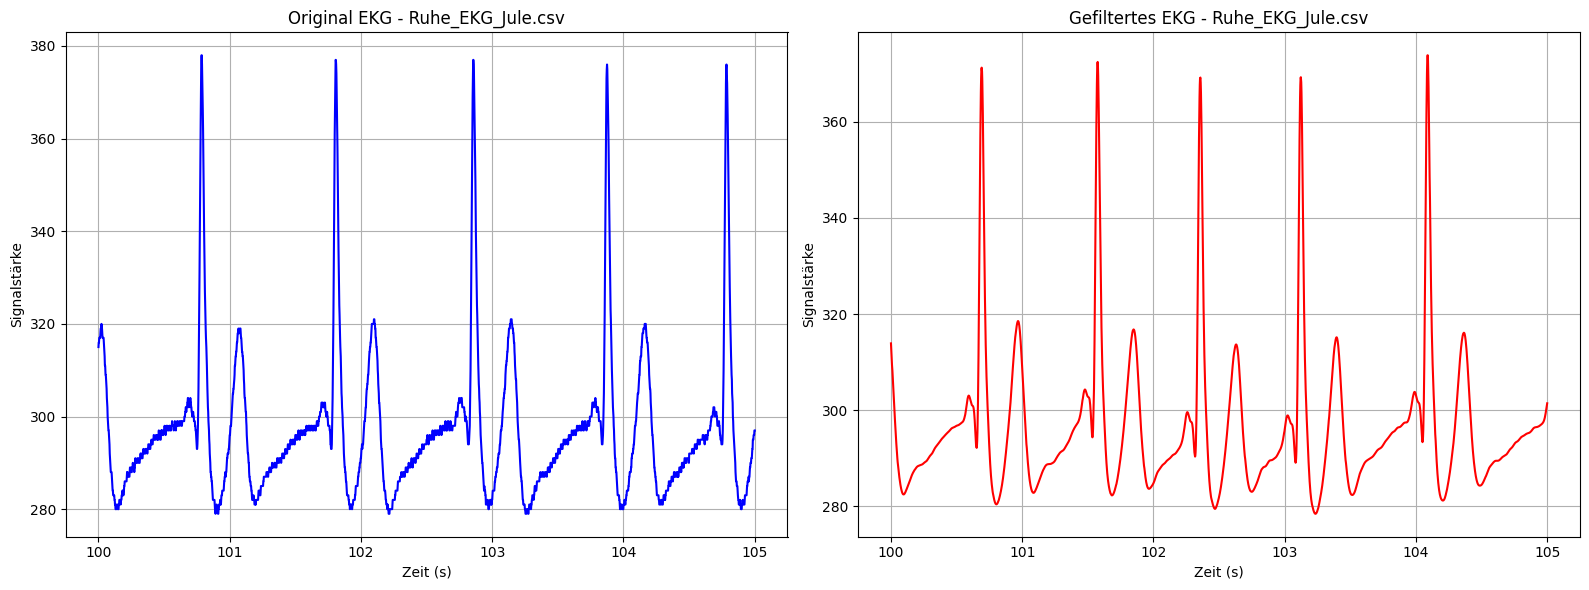

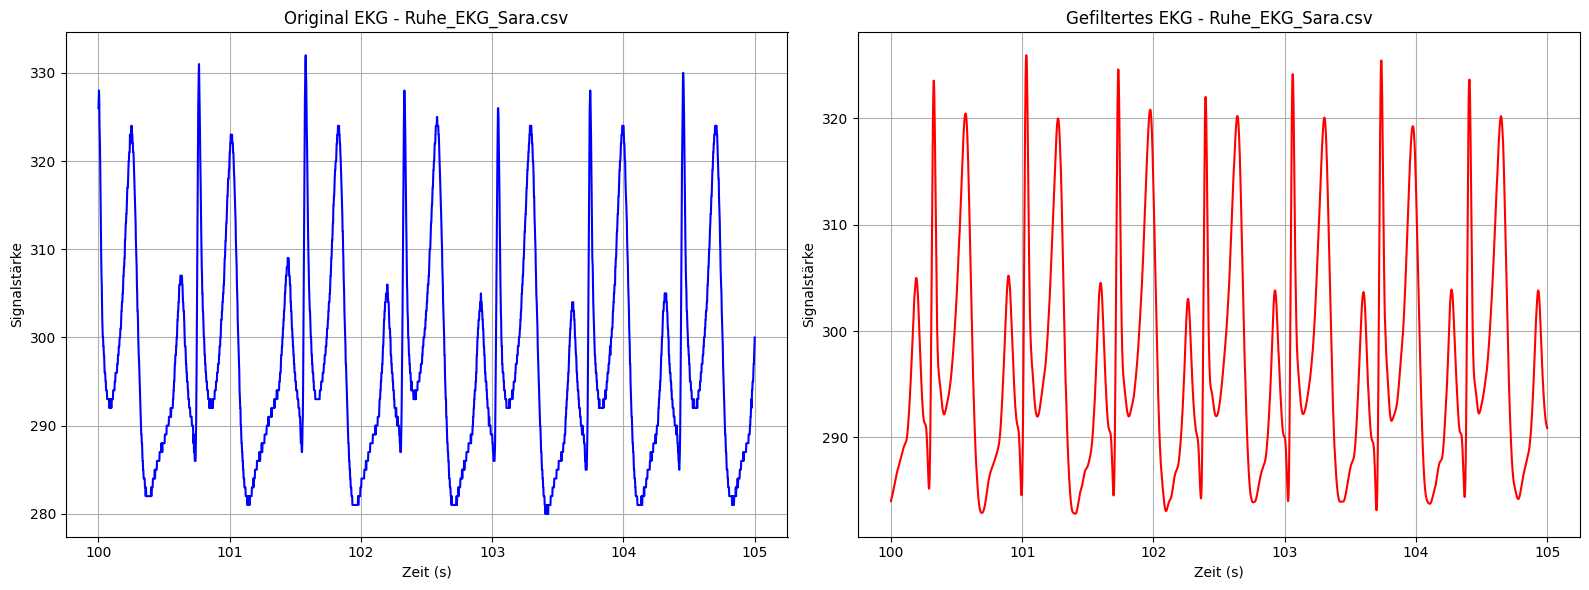

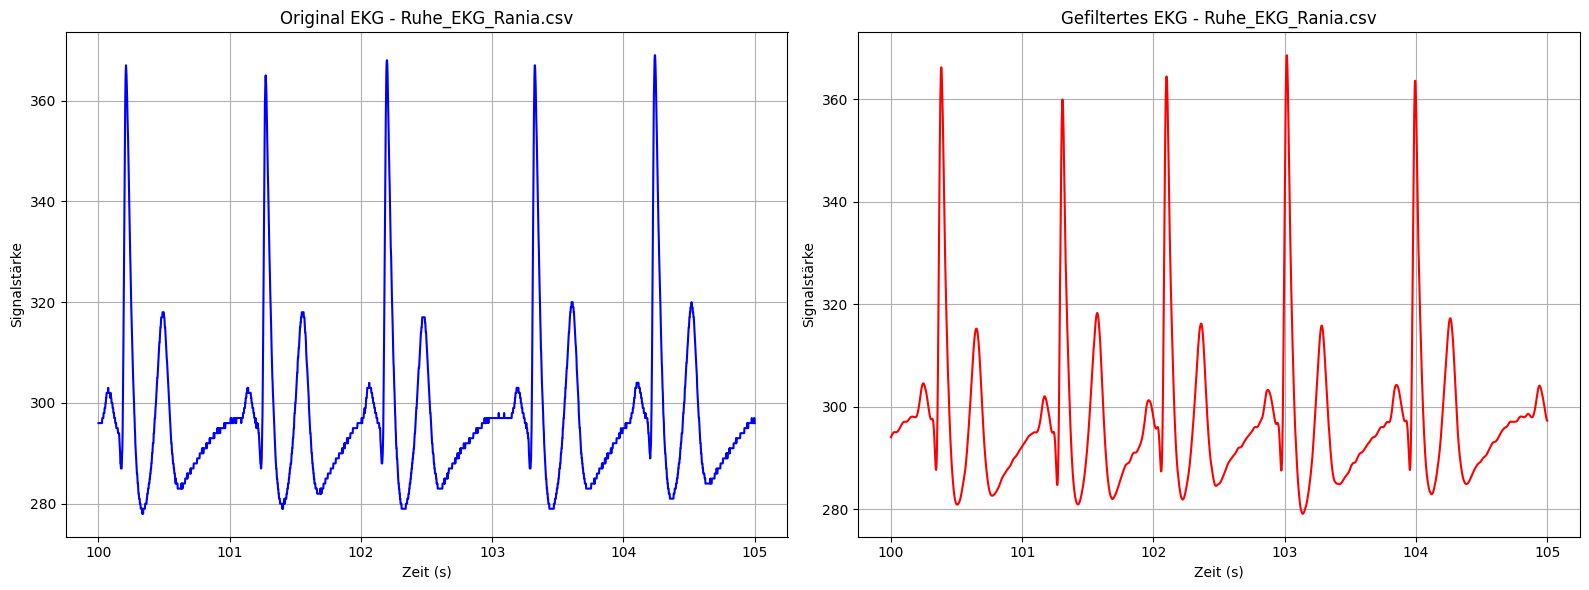

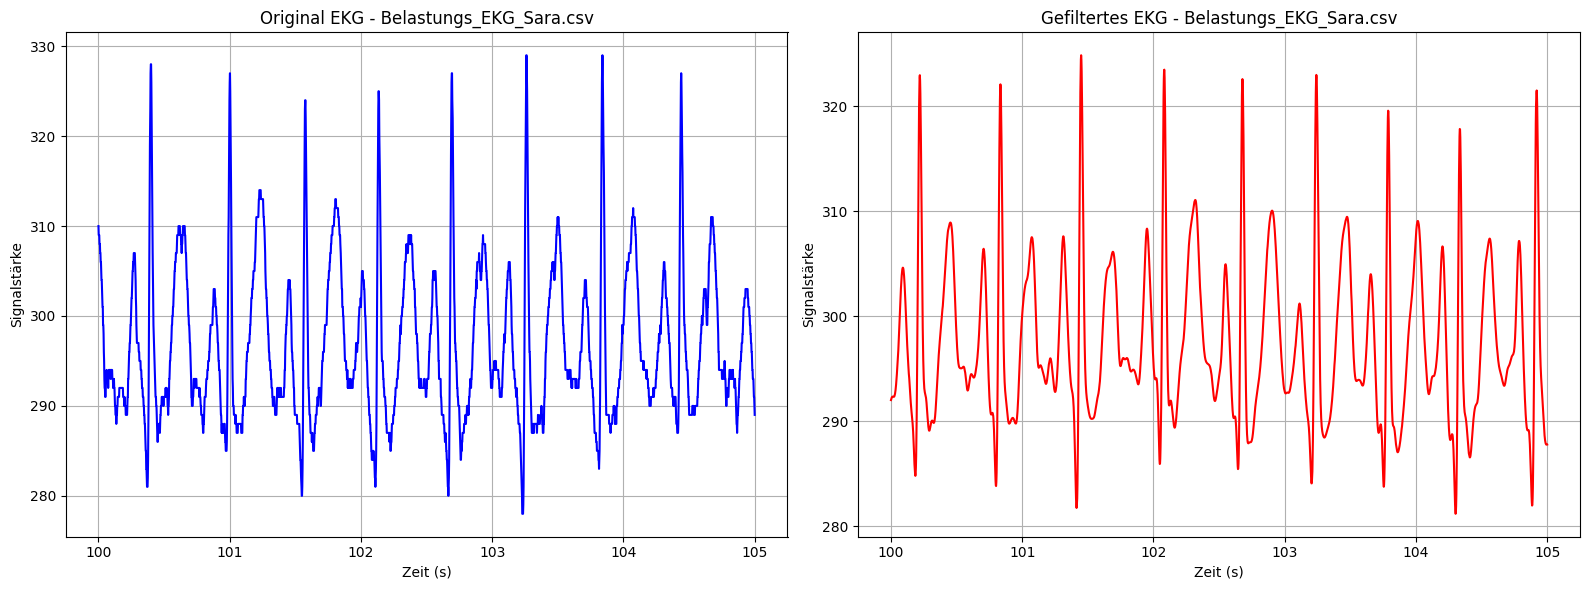

(array([100.   , 100.002, 100.004, ..., 104.996, 104.998, 105.   ]),
 array([292.01919605, 292.11044091, 292.19190058, ..., 287.77400832,
        287.77938858, 287.7883542 ]))

In [13]:
def plot_ekg(filename):
    """
    Liest EKG-Daten aus einer CSV-Datei ein, filtert das hochfrequente Rauschen und plottet die mittleren 5 Sekunden
    der Aufnahmen.
    
    :param filename: Pfad zur CSV-Datei mit EKG-Daten
    """
    # CSV-Datei einlesen; erste Spalte als 'Wert' und zweite Spalte als 'Zeit' benennen
    df = pd.read_csv(filename, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Überprüfe auf Zeilen mit fehlenden oder falschen Werten
    df = df.dropna()  # Entferne Zeilen mit NaN-Werten
    df = df[df['Wert'].apply(lambda x: isinstance(x, (int, float)))]  # Entferne Zeilen, bei denen 'Wert' keine Zahl ist
    df = df[df['Zeit'].apply(lambda x: isinstance(x, (int, float)))]  # Entferne Zeilen, bei denen 'Zeit' keine Zahl ist
    
    # Zeit in Sekunden umrechnen
    df['Zeit'] = df['Zeit'] / 1000
    
    # Extrahiere das EKG-Signal und die Zeit aus dem DataFrame
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Setze Filterparameter
    Wn = 0.1  # Normalisierte Cutoff-Frequenz
    b, a = scipy.signal.butter(4, Wn, 'low', analog=False)  # Butterworth-Filter erstellen
    
    # Filtere das EKG-Signal
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
        
    # Definiere die Start- und Endzeitpunkte für die Zeitspanne 
    start_time = 100
    end_time = 105
    
    # Filtere die Daten für die angegebene Zeitspanne
    mid_section = df[(df['Zeit'] >= start_time) & (df['Zeit'] <= end_time)]
    
    # Sicherstellen, dass genug Daten vorhanden sind, bevor geplottet wird
    if len(mid_section) == 0:
        print(f"Keine Daten im angegebenen Zeitraum für {filename}.")
        return
    
    # Plotten der Original- und gefilterten EKG-Daten nebeneinander
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Originalsignal plotten (blau)
    axes[0].plot(mid_section['Zeit'], mid_section['Wert'], color='blue', linestyle='-')
    axes[0].set_title(f'Original EKG - {filename}')
    axes[0].set_xlabel('Zeit (s)')
    axes[0].set_ylabel('Signalstärke')
    axes[0].grid(True)
    
    # Gefiltertes Signal plotten (rot)
    filtered_section = ecg_filtered[:len(mid_section)]
    axes[1].plot(mid_section['Zeit'], filtered_section, color='red', linestyle='-')
    axes[1].set_title(f'Gefiltertes EKG - {filename}')
    axes[1].set_xlabel('Zeit (s)')
    axes[1].set_ylabel('Signalstärke')
    axes[1].grid(True)
    
    # Layout anpassen und anzeigen
    plt.tight_layout()
    plt.show()
    
    # Rückgabe der gefilterten Daten für die Wellenmarkierung
    return mid_section['Zeit'].values, filtered_section

# Aufruf der Funktion mit verschiedenen EKG-Daten
plot_ekg('Ruhe_EKG_Jule.csv')
plot_ekg('Ruhe_EKG_Sara.csv')
plot_ekg('Ruhe_EKG_Rania.csv')
plot_ekg('Belastungs_EKG_Sara.csv')


Markierung P-Welle, QRS-Komplex und T-Welle im Plot eines Teilnehmers.

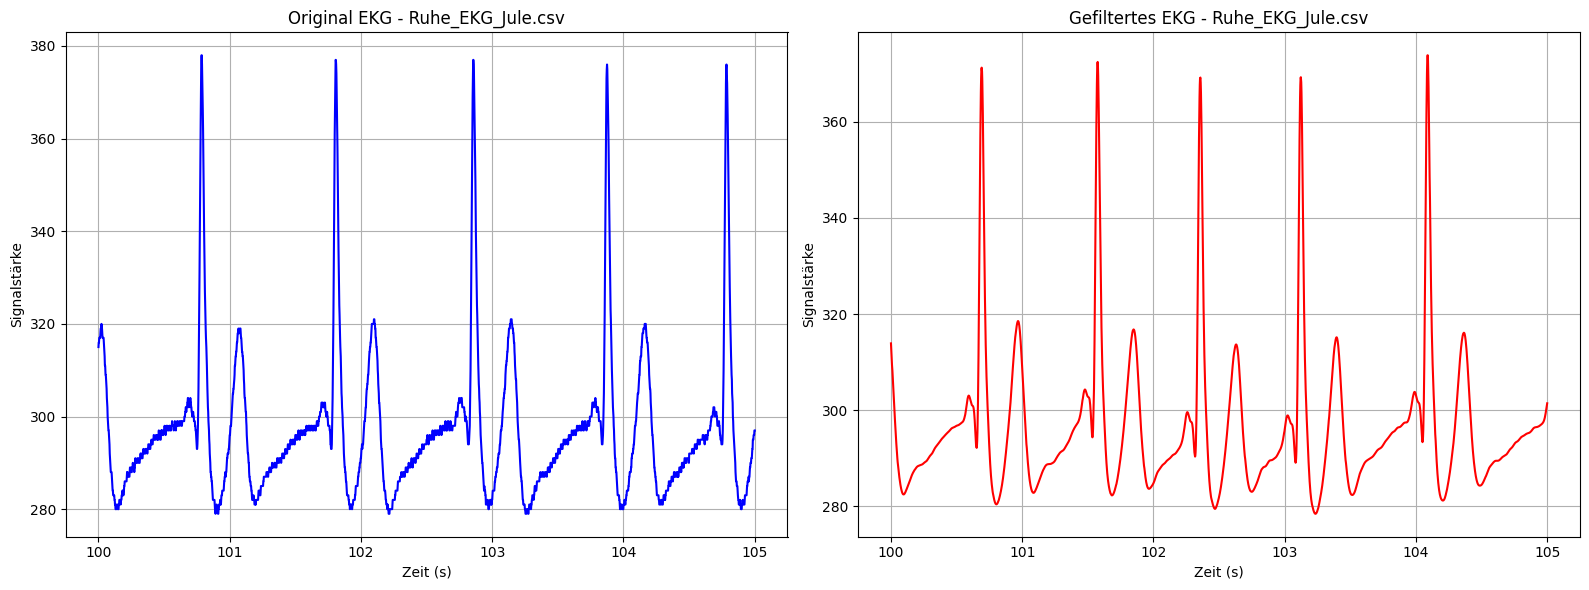

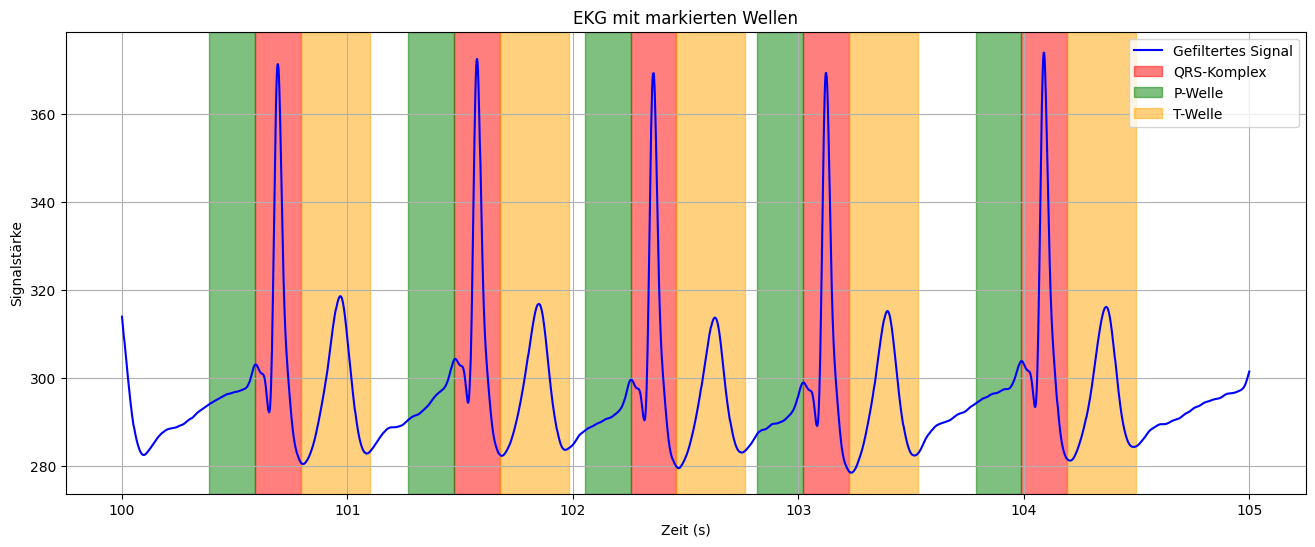

In [16]:
def mark_ekg_waves(time, signal):
    """
    Markiert die P-Welle, den QRS-Komplex und die T-Welle in einem gefilterten EKG-Plot.
    
    :param time: Zeitdaten des gefilterten EKG-Signals
    :param signal: Gefiltertes EKG-Signal
    """
    # QRS-Komplex detektieren
    peaks, _ = scipy.signal.find_peaks(signal, distance=200, height=np.mean(signal) + 0.5 * np.std(signal))
    
    # Visualisieren
    plt.figure(figsize=(16, 6))
    plt.plot(time, signal, label='Gefiltertes Signal', color='blue')
    
    # Markiere P-Welle, QRS-Komplex und T-Welle
    for peak in peaks:
        qrs_start = max(0, peak - 50)  # QRS-Komplex beginnt typischerweise 50 ms vor dem Peak
        qrs_end = min(len(signal), peak + 50)  # QRS-Komplex endet 50 ms nach dem Peak
        
        p_wave_start = max(0, peak - 150)  # P-Welle liegt typischerweise 150 ms vor dem Peak
        p_wave_end = qrs_start
        
        t_wave_start = qrs_end
        t_wave_end = min(len(signal), peak + 200)  # T-Welle liegt typischerweise 200 ms nach dem Peak
        
        # Markiere QRS-Komplex
        plt.axvspan(time[qrs_start], time[qrs_end], color='red', alpha=0.5, label='QRS-Komplex' if peak == peaks[0] else "")
        
        # Markiere P-Welle
        plt.axvspan(time[p_wave_start], time[p_wave_end], color='green', alpha=0.5, label='P-Welle' if peak == peaks[0] else "")
        
        # Markiere T-Welle
        plt.axvspan(time[t_wave_start], time[t_wave_end], color='orange', alpha=0.5, label='T-Welle' if peak == peaks[0] else "")
    
    # Beschriftungen
    plt.xlabel('Zeit (s)')
    plt.ylabel('Signalstärke')
    plt.title('EKG mit markierten Wellen')
    plt.legend()
    plt.grid(True)
    plt.show()

# Beispiel: Angenommen, gefilterte Daten wurden in der vorherigen Zelle erzeugt
# Aufruf der Funktion mit gefilterten Daten (z. B. time und signal)
# Beispielwerte für time und signal sollten aus der vorherigen Zelle kommen:
# mark_ekg_waves(time, ecg_filtered)

time, signal = plot_ekg('Ruhe_EKG_Jule.csv')
mark_ekg_waves(time, signal)

Welches Phänomen ist für die jeweiligen elektrischen Signale des EKGs verantwortlich

### Physiologische Phänomene der EKG-Signale:

1. **P-Welle**:
   - **Beschreibung**: Die P-Welle repräsentiert die Depolarisation der Vorhöfe (Atrien).
   - **Physiologischer Hintergrund**: Diese Phase zeigt, wie sich elektrische Impulse von der sinoatrialen (SA-) Knoten durch die Vorhöfe ausbreiten. Dieser Prozess leitet die Kontraktion der Vorhöfe ein und fördert den Blutfluss in die Ventrikel.

2. **QRS-Komplex**:
   - **Beschreibung**: Der QRS-Komplex zeigt die Depolarisation der Ventrikel (Herzkammern).
   - **Physiologischer Hintergrund**: Dies ist der wichtigste Teil des EKGs und signalisiert die elektrische Aktivität, die die Kontraktion der Herzkammern auslöst. Sie beginnt mit der Erregung der Herzspitze (Q-Welle), dem schnellen Anstieg der Erregung der Hauptmassen (R-Welle) und endet mit der Depolarisation der Basis der Ventrikel (S-Welle).

3. **T-Welle**:
   - **Beschreibung**: Die T-Welle repräsentiert die Repolarisation der Ventrikel.
   - **Physiologischer Hintergrund**: Nach der Kontraktion kehren die Ventrikel in ihren Ruhezustand zurück, wobei die Ladungsverhältnisse in den Zellen wiederhergestellt werden. Diese Phase ist entscheidend für die Vorbereitung der nächsten Depolarisation.

---

**Zusammenhang**:
Diese Signale sind Ausdruck der elektrischen Erregung und Erholung des Herzens. Sie korrelieren direkt mit der mechanischen Funktion des Herzens: Vorhofkontraktion, Ventrikelkontraktion und -entspannung, die für die Aufrechterhaltung des Blutflusses im Kreislaufsystem unerlässlich sind.

Aufgabe 4: Geben Sie den Code an, welcher für die Aufnahme der Rohdaten des EKG-Signals verantwortlich ist.

In [6]:

/*
 * Dieser Code ermöglicht die Aufnahme von analogen Daten mit einer Abtastfrequenz von 500 Hz
 */

#define sf 500 //für eine andere Abtastrate ändern
int tc (1000/(sf));     // Zeitkonstante

unsigned int ADC_Value = 0;    //derzeitiger ADC Wert
unsigned long last_time = 0;
void setup() {
  Serial.begin(500000);
}


// die loop() Routine läuft, solange der Microcontroller mit Spannung versorgt ist
void loop() {

  if (millis() - last_time >= tc) {  //sobald 2ms vergangen sind, wird der analoge Wert gespeichert - bei 1000Hz jede 1ms
    last_time = millis();
    ADC_Value = analogRead(A0);
    
    Serial.print(ADC_Value);
    Serial.print('\t');
    Serial.print(millis());
    Serial.println();
    }
}


IndentationError: unexpected indent (2673190481.py, line 2)

Aufgabe 5: Plotten Sie etwas 5 Sekunden des EKG Signals vom Experiment in Ruhe von einem Teilnehmen (gefiltert). Nutzen Sie die Ergebnisse der Peak-Suche_Funktion, um die R-Zacken im Plot zu label

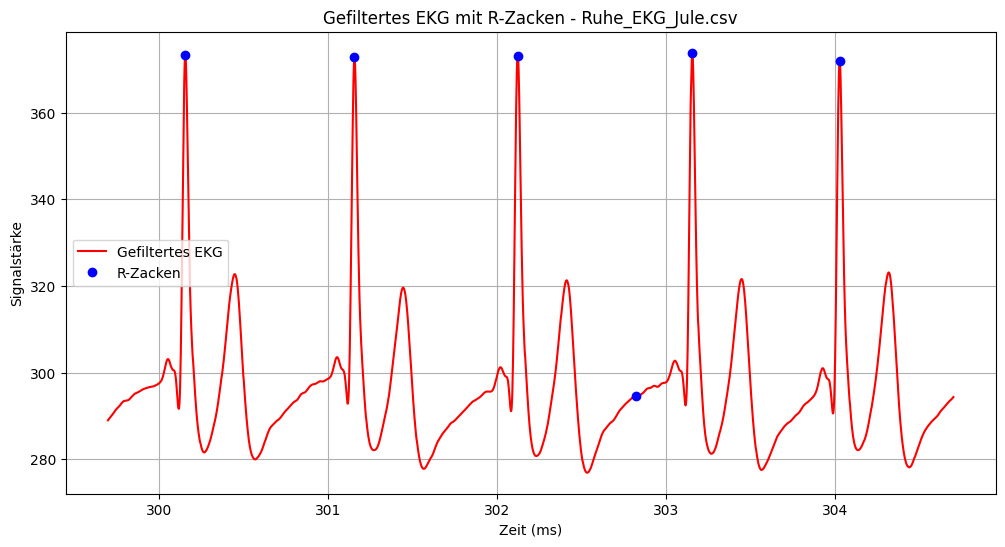

In [21]:
# Funktion zur Darstellung des EKG-Signals mit markierten R-Zacken

def plot_ekg_with_peaks(Ruhe_EKG_Jule):
    """
    Liest EKG-Daten aus einer CSV-Datei, filtert hochfrequentes Rauschen, 
    und plottet die mittleren 5 Sekunden der Aufnahme mit markierten R-Zacken.
    
    :param filename: Pfad zur CSV-Datei mit EKG-Daten
    """
    # CSV-Datei einlesen
    df = pd.read_csv(Ruhe_EKG_Jule, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Daten bereinigen
    df = df.dropna()
    df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
    df['Zeit'] = pd.to_numeric(df['Zeit'], errors='coerce')
    df = df.dropna()
    
    # Zeit in Sekunden
    df['Zeit'] = df['Zeit'] / 1000

    # Extrahiere das EKG-Signal und die Zeit
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Butterworth-Filter anwenden
    Wn = 0.1  # Normalisierte Cutoff-Frequenz
    b, a = scipy.signal.butter(4, Wn, 'low', analog=False)
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
    
    # Zeitraum für die mittleren 5 Sekunden
    start_time = time[0] + (time[-1] - time[0]) / 2 - 2.5
    end_time = start_time + 5
    mid_section = df[(df['Zeit'] >= start_time) & (df['Zeit'] <= end_time)]
    
    if len(mid_section) == 0:
        print(f"Keine Daten im angegebenen Zeitraum für {Ruhe_EKG_Jule}.")
        return
    
    # Gefiltertes Signal für den Zeitraum
    filtered_section = ecg_filtered[(time >= start_time) & (time <= end_time)]
    section_time = time[(time >= start_time) & (time <= end_time)]

    # Find Peaks Funktion zur Markierung der R-Zacken
    peaks, _ = scipy.signal.find_peaks(filtered_section, height=0.5, distance=150)

    # Plotten der gefilterten EKG-Daten mit markierten R-Zacken
    plt.figure(figsize=(12, 6))
    plt.plot(section_time, filtered_section, color='red', label='Gefiltertes EKG')
    plt.plot(section_time[peaks], filtered_section[peaks], 'bo', label='R-Zacken')
    plt.title(f'Gefiltertes EKG mit R-Zacken - {Ruhe_EKG_Jule}')
    plt.xlabel('Zeit (ms)')
    plt.ylabel('Signalstärke')
    plt.legend()
    plt.grid(True)
    plt.show()

# Funktion aufrufen für die Daten von Jule
plot_ekg_with_peaks('Ruhe_EKG_Jule.csv')


 Aufgabe 6: Verwenden Sie Python, um die mittlere Herzfrequenz und HRV (mit derStandardabweichung) für jeden der drei Teilnehmer zu bestimmen. Vergleichen Sie die Ergebnisse in einer Tabelle (eine Zeile pro Teilnehmer). Denken Sie daran, alle Datensätze zu den jeweiligen Teilnehmern mit abzugeben.
 Die Berechnung soll im Code MainCode2 stattfinden.


Verarbeite Daten für Jule...


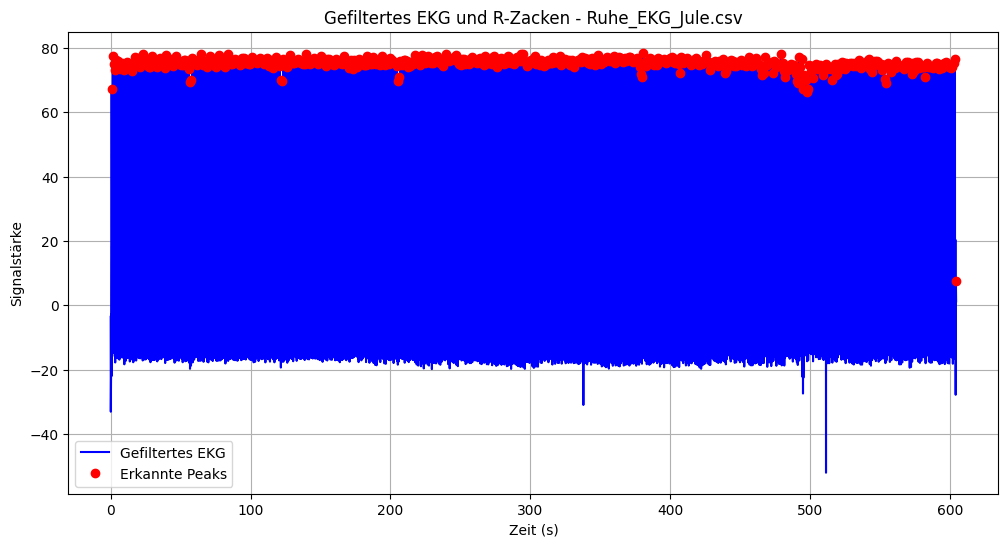


Verarbeite Daten für Rania...


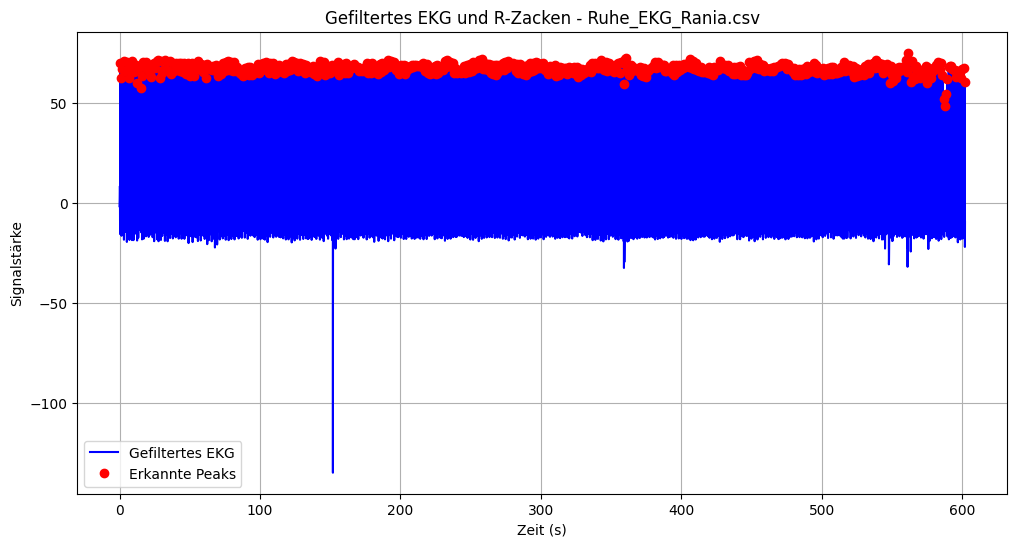


Verarbeite Daten für Sara...


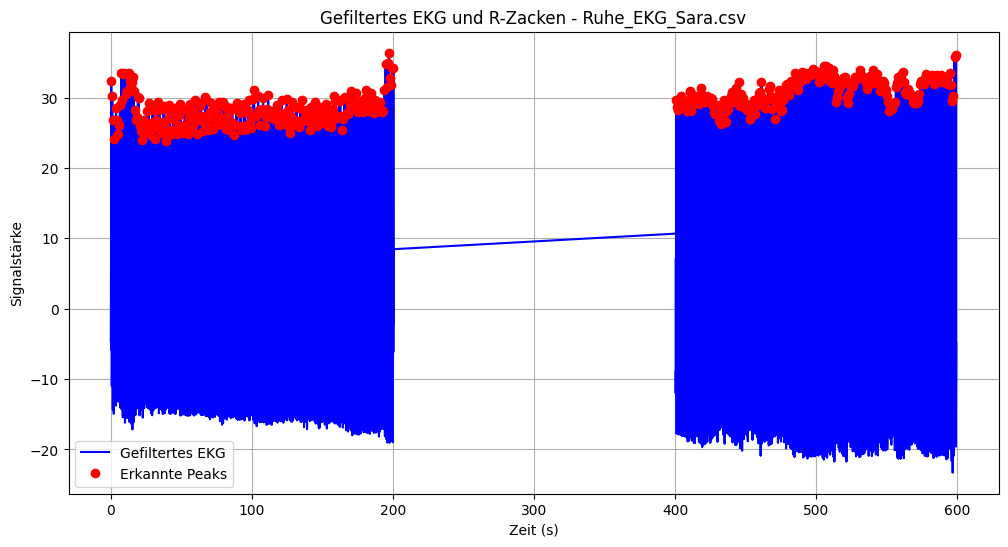


Ergebnisse:
    Name  Avg Heart Rate (BPM)     HRV (ms)
0   Jule             63.725084    89.673241
1  Rania             63.055603   115.869545
2   Sara             52.231362  9191.174196

Vergleich der Ergebnisse:
- Jule hat eine mittlere Herzfrequenz von 63.73 BPM und eine HRV von 89.67 ms.
- Rania hat eine mittlere Herzfrequenz von 63.06 BPM und eine HRV von 115.87 ms.
- Sara hat eine mittlere Herzfrequenz von 52.23 BPM und eine HRV von 9191.17 ms.

Zusammenfassung:
Die Visualisierung hilft, Artefakte zu identifizieren. Passen Sie bei Bedarf die Filter- oder Peak-Parameter an.


In [24]:
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

def calculate_hr_and_hrv_with_visualization(filename):
    """
    Berechnet die mittlere Herzfrequenz und die Herzfrequenzvariabilität (HRV)
    aus einer CSV-Datei mit EKG-Daten und visualisiert die erkannten Peaks.
    
    :param filename: Pfad zur CSV-Datei mit EKG-Daten
    :return: Durchschnittliche Herzfrequenz (BPM) und HRV (Standardabweichung in ms)
    """
    # CSV-Datei einlesen
    df = pd.read_csv(filename, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Daten bereinigen
    df = df.dropna()
    df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
    df['Zeit'] = pd.to_numeric(df['Zeit'], errors='coerce')
    df = df.dropna()
    
    # Zeit in Sekunden
    df['Zeit'] = df['Zeit'] / 1000
    
    # Extrahiere das EKG-Signal und die Zeit
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Bandpassfilter (0.5–50 Hz) anwenden
    fs = 1000  # Abtastrate in Hz (anpassen, falls abweichend)
    lowcut = 0.5 / (fs / 2)
    highcut = 50 / (fs / 2)
    b, a = scipy.signal.butter(4, [lowcut, highcut], btype='band')
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
    
    # Find Peaks zur Bestimmung der R-Zacken (Threshold angepasst)
    peaks, _ = scipy.signal.find_peaks(ecg_filtered, height=1.0, distance=300)
    
    # Plot des Signals und der erkannten Peaks
    plt.figure(figsize=(12, 6))
    plt.plot(time, ecg_filtered, label="Gefiltertes EKG", color='blue')
    plt.plot(time[peaks], ecg_filtered[peaks], 'ro', label="Erkannte Peaks")
    plt.title(f"Gefiltertes EKG und R-Zacken - {filename}")
    plt.xlabel("Zeit (s)")  # Zeit in Sekunden
    plt.ylabel("Signalstärke")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Berechnung der RR-Intervalle (Abstände zwischen Peaks in ms)
    rr_intervals = np.diff(time[peaks]) * 1000  # Zeitdifferenzen zwischen Peaks in ms umrechnen
    
    # Herzfrequenz (BPM) berechnen: 60 / durchschnittliches RR-Intervall (in Sekunden)
    avg_heart_rate = 60 / (np.mean(rr_intervals) / 1000) if len(rr_intervals) > 0 else 0
    
    # Herzfrequenzvariabilität (Standardabweichung der RR-Intervalle in ms)
    hrv = np.std(rr_intervals) if len(rr_intervals) > 0 else 0
    
    return avg_heart_rate, hrv

# Daten für jeden Teilnehmer berechnen und visualisieren
participants = {
    "Jule": "Ruhe_EKG_Jule.csv",
    "Rania": "Ruhe_EKG_Rania.csv",
    "Sara": "Ruhe_EKG_Sara.csv"
}

results = []
for name, file in participants.items():
    print(f"\nVerarbeite Daten für {name}...")
    avg_hr, hrv = calculate_hr_and_hrv_with_visualization(file)
    results.append({"Name": name, "Avg Heart Rate (BPM)": avg_hr, "HRV (ms)": hrv})

# Ergebnisse als Tabelle darstellen
results_df = pd.DataFrame(results)

# Tabelle drucken
print("\nErgebnisse:")
print(results_df)

# Vergleich der Ergebnisse
print("\nVergleich der Ergebnisse:")
for index, row in results_df.iterrows():
    print(f"- {row['Name']} hat eine mittlere Herzfrequenz von {row['Avg Heart Rate (BPM)']:.2f} BPM "
          f"und eine HRV von {row['HRV (ms)']:.2f} ms.")

# Zusammenfassung
print("\nZusammenfassung:")
print("Die Visualisierung hilft, Artefakte zu identifizieren. Passen Sie bei Bedarf die Filter- oder Peak-Parameter an.")


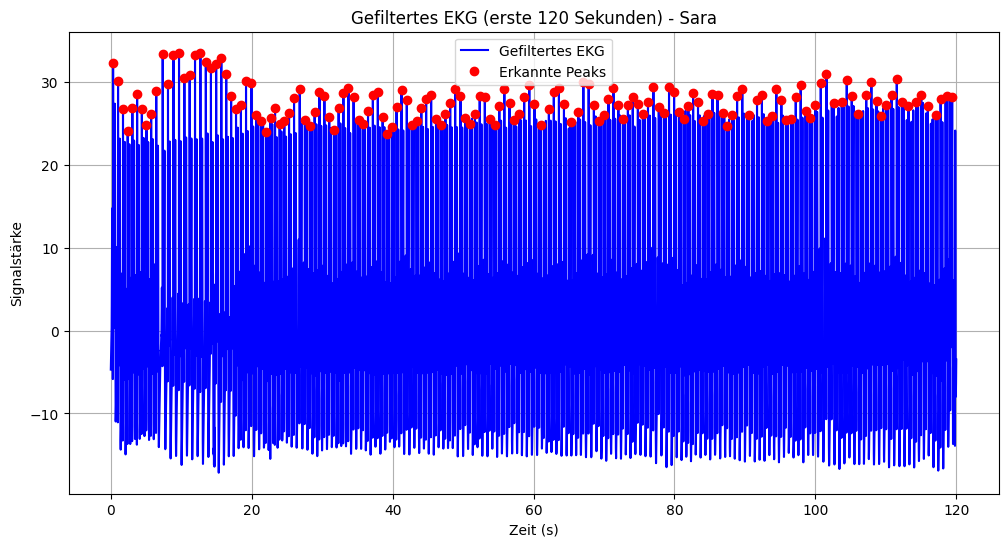

Mittlere Herzfrequenz (BPM): 81.62
Herzfrequenzvariabilität (HRV, ms): 104.16


In [26]:
# Code für Heart Rate Variability (HRV) Analyse für Ruhe-EKG-Daten von Sara

def calculate_hr_and_hrv_for_sara(filename, duration=120):
    """
    Berechnet die mittlere Herzfrequenz und die HRV für die ersten 2 Minuten der Messung.
    
    :param filename: Pfad zur CSV-Datei mit EKG-Daten
    :param duration: Zeitdauer (in Sekunden), die berücksichtigt werden soll (Standard: 2 Minuten = 120 Sekunden)
    :return: Durchschnittliche Herzfrequenz (BPM), HRV (Standardabweichung in ms), und ein Plot des Signals
    """
    # CSV-Datei einlesen
    df = pd.read_csv(filename, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Daten bereinigen
    df = df.dropna()
    df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
    df['Zeit'] = pd.to_numeric(df['Zeit'], errors='coerce')
    df = df.dropna()
    
    # Zeit in Sekunden umrechnen
    df['Zeit'] = df['Zeit'] / 1000
    
    # Beschränke auf die ersten 2 Minuten der Messung (in Sekunden)
    df = df[df['Zeit'] <= duration]
    
    # Extrahiere das EKG-Signal und die Zeit
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Bandpassfilter (0.5–50 Hz) anwenden
    fs = 1000  # Abtastrate in Hz (anpassen, falls abweichend)
    lowcut = 0.5 / (fs / 2)
    highcut = 50 / (fs / 2)
    b, a = scipy.signal.butter(4, [lowcut, highcut], btype='band')
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
    
    # Find Peaks zur Bestimmung der R-Zacken (Threshold angepasst)
    peaks, _ = scipy.signal.find_peaks(ecg_filtered, height=1.0, distance=300)
    
    # Berechnung der RR-Intervalle (Abstände zwischen Peaks in ms)
    rr_intervals = np.diff(time[peaks]) * 1000  # Zeitdifferenzen zwischen Peaks in ms umrechnen
    
    # Herzfrequenz (BPM) berechnen: 60 / durchschnittliches RR-Intervall (in Sekunden)
    avg_heart_rate = 60 / (np.mean(rr_intervals) / 1000) if len(rr_intervals) > 0 else 0
    
    # Herzfrequenzvariabilität (Standardabweichung der RR-Intervalle in ms)
    hrv = np.std(rr_intervals) if len(rr_intervals) > 0 else 0
    
    # Plot des gefilterten Signals mit R-Zacken
    plt.figure(figsize=(12, 6))
    plt.plot(time, ecg_filtered, label="Gefiltertes EKG", color='blue')
    plt.plot(time[peaks], ecg_filtered[peaks], 'ro', label="Erkannte Peaks")
    plt.title(f"Gefiltertes EKG (erste {duration} Sekunden) - Sara")
    plt.xlabel("Zeit (s)")  # Zeit in Sekunden
    plt.ylabel("Signalstärke")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return avg_heart_rate, hrv

# Berechnung und Plot für Sara
sara_file = "Ruhe_EKG_Sara.csv"  # Pfad zur Datei
sara_avg_hr, sara_hrv = calculate_hr_and_hrv_for_sara(sara_file)

# Ergebnisse ausgeben
print(f"Mittlere Herzfrequenz (BPM): {sara_avg_hr:.2f}")
print(f"Herzfrequenzvariabilität (HRV, ms): {sara_hrv:.2f}")


Vergleich der Werte

In [27]:

def calculate_hr_and_hrv(filename, duration=None):
    """
    Berechnet die mittlere Herzfrequenz und die HRV aus einer CSV-Datei mit EKG-Daten.
    
    :param filename: Pfad zur CSV-Datei mit EKG-Daten
    :param duration: Maximale Zeitdauer (in ms), die berücksichtigt werden soll (optional)
    :return: Durchschnittliche Herzfrequenz (BPM), HRV (Standardabweichung)
    """
    # CSV-Datei einlesen
    df = pd.read_csv(filename, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Daten bereinigen
    df = df.dropna()
    df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
    df['Zeit'] = pd.to_numeric(df['Zeit'], errors='coerce')
    df = df.dropna()
    
    # Beschränke auf die angegebene Zeitdauer
    if duration is not None:
        df = df[df['Zeit'] <= duration]
    
    # Extrahiere das EKG-Signal und die Zeit
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Bandpassfilter (0.5–50 Hz) anwenden
    fs = 1000  # Abtastrate in Hz (anpassen, falls abweichend)
    lowcut = 0.5 / (fs / 2)
    highcut = 50 / (fs / 2)
    b, a = scipy.signal.butter(4, [lowcut, highcut], btype='band')
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
    
    # Find Peaks zur Bestimmung der R-Zacken
    peaks, _ = scipy.signal.find_peaks(ecg_filtered, height=1.0, distance=300)
    
    # Berechnung der RR-Intervalle (Abstände zwischen Peaks in ms)
    rr_intervals = np.diff(time[peaks])  # Zeitdifferenzen zwischen Peaks
    
    # Herzfrequenz (BPM) berechnen: 60.000 ms / durchschnittliches RR-Intervall
    avg_heart_rate = 60000 / np.mean(rr_intervals) if len(rr_intervals) > 0 else 0
    
    # Herzfrequenzvariabilität (Standardabweichung der RR-Intervalle)
    hrv = np.std(rr_intervals) if len(rr_intervals) > 0 else 0
    
    return avg_heart_rate, hrv

# Berechnungen für alle drei Teilnehmer
participants = {
    "Jule": "Ruhe_EKG_Jule.csv",
    "Rania": "Ruhe_EKG_Rania.csv",
    "Sara": "Ruhe_EKG_Sara.csv"
}

results = []
for name, file in participants.items():
    avg_hr, hrv = calculate_hr_and_hrv(file, duration=120000 if name == "Sara" else None)
    results.append({"Name": name, "Mittlere Herzfrequenz (BPM)": avg_hr, "HRV (ms)": hrv})

# Ergebnisse als Tabelle darstellen
results_df = pd.DataFrame(results)

# Tabelle anzeigen
print("\nErgebnisse:")
print(results_df)

# Vergleich der Ergebnisse ausgeben
print("\nVergleich der Ergebnisse:")
for index, row in results_df.iterrows():
    print(f"- {row['Name']} hat eine mittlere Herzfrequenz von {row['Mittlere Herzfrequenz (BPM)']:.2f} BPM "
          f"und eine HRV von {row['HRV (ms)']:.2f} ms.")

# Zusammenfassung
print("\nZusammenfassung:")
print("Die Ergebnisse zeigen die individuellen Unterschiede in Herzfrequenz und HRV. "
      "Sara's Werte basieren nur auf den ersten 2 Minuten der Messung, während die anderen über die gesamte Messung analysiert wurden.")



Ergebnisse:
    Name  Mittlere Herzfrequenz (BPM)    HRV (ms)
0   Jule                    63.725084   89.673241
1  Rania                    63.055603  115.869545
2   Sara                    81.619629  104.156778

Vergleich der Ergebnisse:
- Jule hat eine mittlere Herzfrequenz von 63.73 BPM und eine HRV von 89.67 ms.
- Rania hat eine mittlere Herzfrequenz von 63.06 BPM und eine HRV von 115.87 ms.
- Sara hat eine mittlere Herzfrequenz von 81.62 BPM und eine HRV von 104.16 ms.

Zusammenfassung:
Die Ergebnisse zeigen die individuellen Unterschiede in Herzfrequenz und HRV. Sara's Werte basieren nur auf den ersten 2 Minuten der Messung, während die anderen über die gesamte Messung analysiert wurden.


Aufgabe 7: Kann man erst machen, wenn die ganze Klasse die Daten eingetragen hat

Aufgabe 8: Lassen Sie einen Ihrer Gruppenteilnehmer das Experiment in Bewegung machen, welches in aufgabe 1 Teil 5 beschrieben ist. Stellen SIe die gefilterte Herzfrequenz über die gesamte Zeit dar.

Verarbeite Datei: Belastungs_EKG_Sara.csv


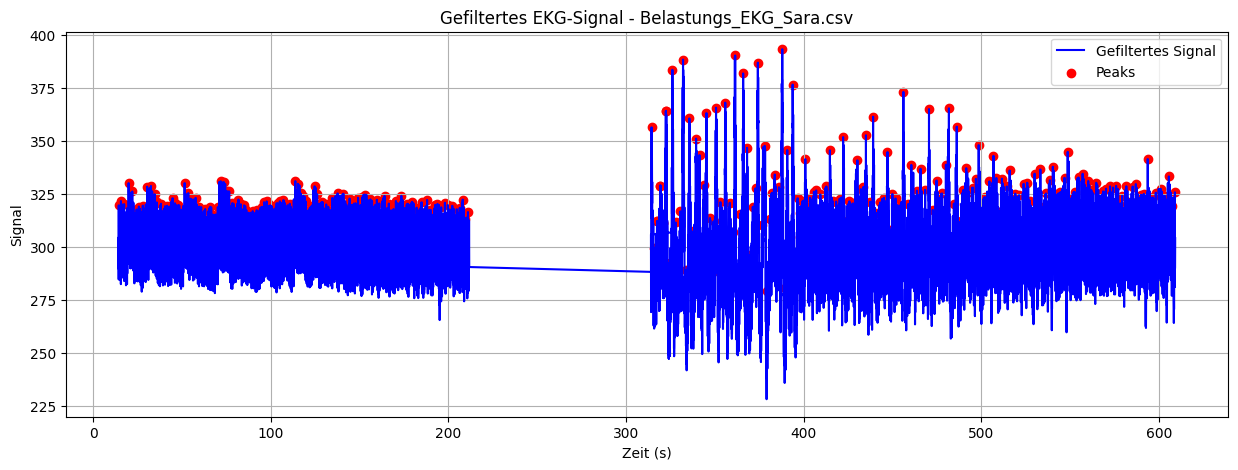

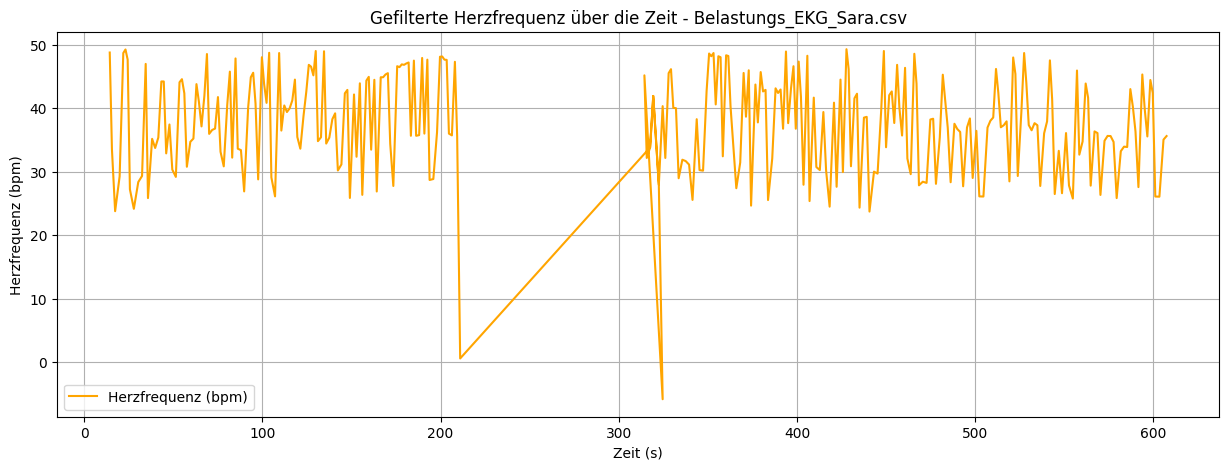

Verarbeite Datei: belastung_Anna.csv


C:\Users\tbirg\AppData\Local\Temp\ipykernel_28276\777782086.py:20: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, delimiter=';', header=None, names=['Signal', 'Time'])


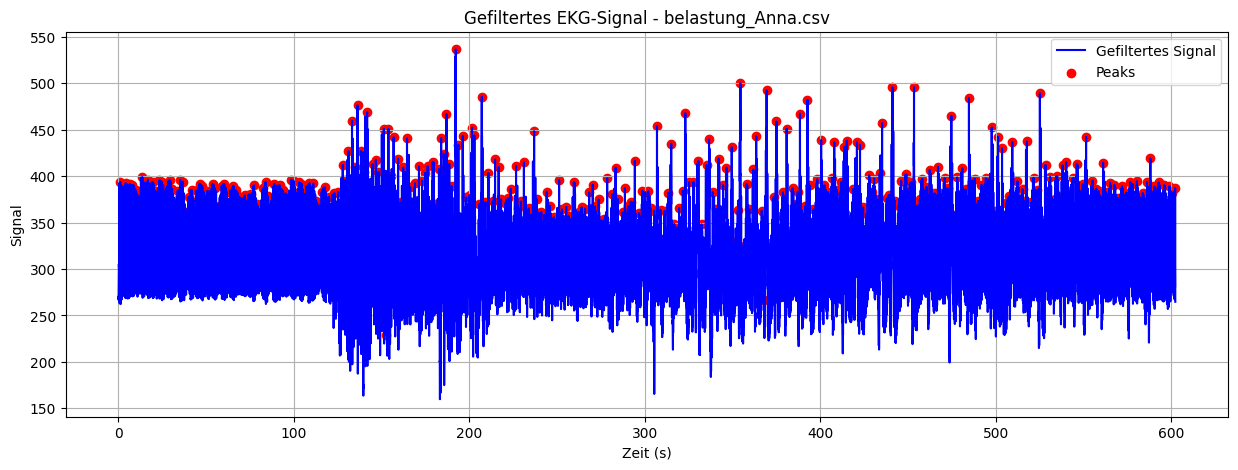

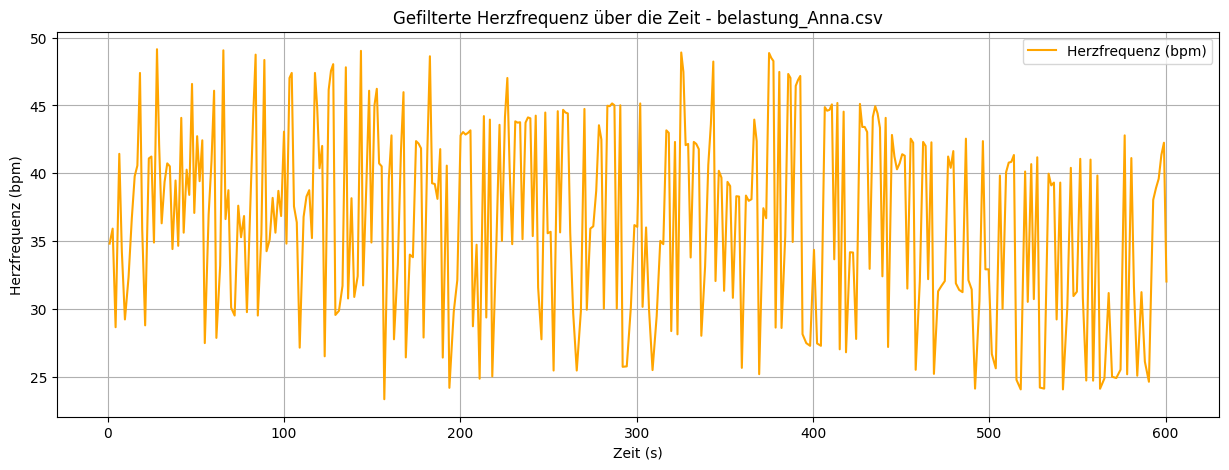

In [52]:
# Funktion für das Tiefpassfilter
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Funktion zur Berechnung der Herzfrequenz
def calculate_heart_rate(peaks, time):
    rr_intervals = np.diff(time[peaks])  # RR-Intervalle in ms
    heart_rate = 60 * 1000 / rr_intervals  # Herzfrequenz in bpm
    time_hr = time[peaks[:-1]]  # Zeitpunkte für die Herzfrequenz
    return heart_rate, time_hr

# Funktion zur Verarbeitung einer einzelnen Datei
def process_ecg_file(filename, fs=1000, cutoff=40):
    print(f"Verarbeite Datei: {filename}")
    # CSV-Datei laden
    df = pd.read_csv(filename, delimiter=';', header=None, names=['Signal', 'Time'])

    # Werte in numerische Typen umwandeln
    df['Signal'] = pd.to_numeric(df['Signal'], errors='coerce')  # Strings in Zahlen umwandeln, ungültige Werte werden NaN
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

    # NaN-Werte entfernen
    df = df.dropna()

    # Rohdaten extrahieren
    signal = df["Signal"].values
    time = df["Time"].values

    # Tiefpassfilter anwenden
    filtered_signal = butter_lowpass_filter(signal, cutoff, fs)

    # Peaks (R-Zacken) im gefilterten Signal finden
    peaks, _ = find_peaks(filtered_signal, height=0.5, distance=fs * 0.6)

    # Herzfrequenz berechnen
    heart_rate, time_hr = calculate_heart_rate(peaks, time)

    # Ergebnisse zurückgeben
    return time_hr, heart_rate, filtered_signal, time

# Liste der Dateien
filenames = ["Belastungs_EKG_Sara.csv", "belastung_Anna.csv"]  # Zusätzlich Datei von anderer Gruppe zur Überprüfung des Codes

# Ergebnisse für jede Datei speichern
for filename in filenames:
    time_hr, heart_rate, filtered_signal, time = process_ecg_file(filename)

    # Plots erstellen
    # Plot 1: Gefiltertes Signal mit Peaks
    plt.figure(figsize=(15, 5))
    plt.plot(time / 1000, filtered_signal, label='Gefiltertes Signal', color='blue')
    peaks, _ = find_peaks(filtered_signal, height=0.5, distance=1000 * 0.6)
    plt.scatter(time[peaks] / 1000, filtered_signal[peaks], color='red', label='Peaks')
    plt.title(f"Gefiltertes EKG-Signal - {filename}")
    plt.xlabel('Zeit (s)')
    plt.ylabel('Signal')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot 2: Gefilterte Herzfrequenz über die Zeit
    plt.figure(figsize=(15, 5))
    plt.plot(time_hr / 1000, heart_rate, color='orange', label='Herzfrequenz (bpm)')
    plt.title(f"Gefilterte Herzfrequenz über die Zeit - {filename}")
    plt.xlabel('Zeit (s)')
    plt.ylabel('Herzfrequenz (bpm)')
    plt.grid()
    plt.legend()
    plt.show()


Aufgabe 9: Fokussieren Sie ich nun auf 5a).i) des Experimets, also dem Ruhen auf dem Ergometer

(a) Plot der gefilterten Herzfrequenz gegen die Zeit während der ersten 3 Minuten. Markierung wann das Treten anfängt

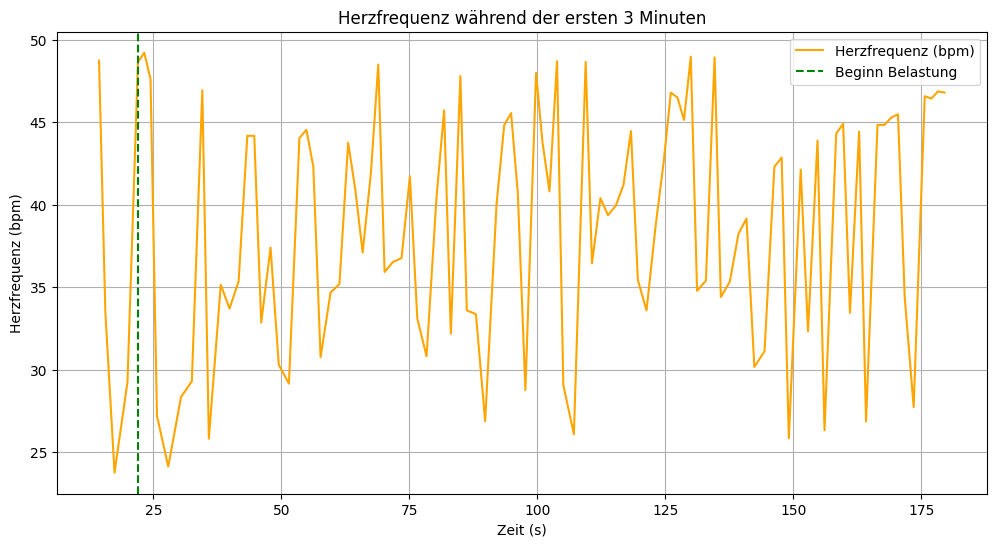

In [50]:
# Auf die ersten 3 Minuten beschränken
mask = time_hr <= 3 * 60 * 1000  # Zeit in ms
time_hr_3min = time_hr[mask]
heart_rate_3min = heart_rate[mask]

# Belastungsbeginn ermitteln (basierend auf Herzfrequenzänderung)
diff_hr = np.diff(heart_rate_3min)
start_idx = np.argmax(diff_hr > 10) + 1 if np.any(diff_hr > 10) else None  # Schwelle: Anstieg > 10 bpm

# Plot der Herzfrequenz
plt.figure(figsize=(12, 6))
plt.plot(time_hr_3min / 1000, heart_rate_3min, label="Herzfrequenz (bpm)", color='orange')
if start_idx is not None:
    plt.axvline(x=time_hr_3min[start_idx] / 1000, color='green', linestyle='--', label='Beginn Belastung')
plt.title("Herzfrequenz während der ersten 3 Minuten")
plt.xlabel("Zeit (s)")
plt.ylabel("Herzfrequenz (bpm)")
plt.legend()
plt.grid()
plt.show()


(b) Beschreiben Sie die Dynamik des Anstiegs der Herzfrequenz. Warum sind Start der Übung und Anstieg der Herzfrequenz nicht zum selben Zetpunkt?

### Dynamik des Anstiegs der Herzfrequenz:
Der Anstieg der Herzfrequenz während des Belastungstests zeigt typischerweise eine Verzögerung zwischen dem Start der Übung und dem eigentlichen Anstieg der Herzfrequenz. Dies ist auf die Reaktionszeit des kardiovaskulären Systems zurückzuführen. 

Zu Beginn der Übung benötigt der Körper mehr Sauerstoff und Energie, wodurch das autonome Nervensystem (vor allem der Sympathikus) aktiviert wird. Diese Aktivierung führt zu einer gesteigerten Herzfrequenz, um:
1. Mehr sauerstoffreiches Blut zu den Muskeln zu transportieren.
2. Den erhöhten Stoffwechselbedarf zu decken.

Die Dynamik zeigt sich in drei Phasen:
1. **Initiale Verzögerung**: 
   - Kurz nach dem Start bleibt die Herzfrequenz nahezu unverändert.
   - Dies liegt daran, dass der Körper die Belastung zunächst registrieren und entsprechende Steuermechanismen aktivieren muss.
   
2. **Schneller Anstieg**: 
   - Sobald die Belastung erfasst wurde, steigt die Herzfrequenz rasch an, da das Herz durch den Sympathikus stimuliert wird und die Durchblutung der arbeitenden Muskulatur priorisiert wird.

3. **Plateauphase**:
   - Nach dem initialen Anstieg erreicht die Herzfrequenz eine stabile Phase, die sich an der Intensität der Übung orientiert.

---

### Grund für die Verzögerung zwischen Start der Übung und Herzfrequenzanstieg:
Die Verzögerung wird durch die Zeit benötigt, um die physiologischen Anpassungen an die Belastung einzuleiten:
1. **Sensorische Wahrnehmung**:
   - Mechanorezeptoren in den Muskeln und Gelenken melden die Bewegung an das zentrale Nervensystem (ZNS).
   - Das ZNS aktiviert daraufhin den Sympathikus, der das Herz stimuliert.

2. **Kardiovaskuläre Anpassung**:
   - Der Sympathikus erhöht die Herzfrequenz nicht sofort; dies geschieht schrittweise.
   - Gleichzeitig wird der Parasympathikus (der die Herzfrequenz senkt) gehemmt.

3. **Metabolische Anpassung**:
   - Muskeln benötigen zunächst Sauerstoff aus lokalen Reserven, bevor das Herz-Kreislauf-System die Blutversorgung erhöht.
   - Diese Prozesse benötigen einige Sekunden, weshalb die Herzfrequenz nicht direkt mit dem Start der Übung ansteigt.

---

### Zusammenfassung:
Der Anstieg der Herzfrequenz nach Beginn der Übung erfolgt mit einer kurzen Verzögerung. Dies liegt daran, dass das kardiovaskuläre System Zeit benötigt, um die Belastung wahrzunehmen und physiologische Anpassungen einzuleiten. Die Dynamik des Anstiegs spiegelt die Aktivierung des Sympathikus und die metabolischen Anforderungen der arbeitenden Muskeln wider.

(c) Beschreiben Sie kurz, was unter dem Begriff Cardiac Output verstanden wird (2-4 Sätze). Warum bewirkt eine Plötzliche Aktivierung der Muskulatur keine direkte Änderung des Cardiac Putputs

Der **Cardiac Output** (Herzzeitvolumen) ist das Blutvolumen, das das Herz pro Minute in den Kreislauf pumpt, und ergibt sich aus Herzfrequenz und Schlagvolumen. Nach Beginn einer Übung zeigt die Herzfrequenz eine kurze Verzögerung, da das kardiovaskuläre System Zeit benötigt, um die Belastung zu registrieren und zu reagieren. Mechanorezeptoren in den Muskeln aktivieren den Sympathikus, der die Herzfrequenz und das Schlagvolumen erhöht, während der Parasympathikus gehemmt wird. Eine plötzliche Aktivierung der Muskulatur führt jedoch nicht sofort zu einer Änderung des Cardiac Outputs, da die Muskeln zunächst lokale Sauerstoffreserven und anaerobe Stoffwechselprozesse nutzen. Erst wenn diese Reserven erschöpft sind, passt sich das Herz-Kreislauf-System an, indem es die Blutversorgung erhöht. Diese Anpassungen benötigen einige Sekunden, weshalb der Cardiac Output nicht unmittelbar auf die Aktivierung der Muskulatur reagiert.

Aufgabe 11: Lesen Sie das Paper" Use of Heart rate to predict Energy expanditure from low to high acitivity levels" durch und erkläre, wie die autoren die Verbindung zwischen Herzfrequenz und Enerieverbrauch entwickelt haben. beantworte folgende fragen: Was ist der Unterschied zwischen den drei beschiebenen Gleichungen? Welche der Gleichungen würden  Sie für die Berechnung ihres Energieverbrauchs in diesm Experiment verwenden? Begründen Sie ihre auswahl. Schreibe mir 2 Paragraphen

- Die Autoren zeigen, dass der Energieverbrauch (EE) über die Herzfrequenz (HF) geschätzt werden kann, da diese linear mit der Sauerstoffaufnahme (VO₂) zusammenhängt. Da der Körper Sauerstoff zur Energiegewinnung nutzt, ermöglicht die Messung der HF eine indirekte Berechnung des Energieverbrauchs. Sie entwickelten Gleichungen basierend auf Experimenten, in denen HF und VO₂ bei unterschiedlichen Aktivitätsniveaus gemessen wurden.


- Die drei beschriebenen Gleichungen zur Schätzung des Energieverbrauchs unterscheiden sich in ihrer Genauigkeit und Anwendung:

1. **Allgemeine Gleichung**: Sie basiert auf einer durchschnittlichen Beziehung zwischen Herzfrequenz (HF) und Sauerstoffaufnahme (VO₂) für die gesamte Population. Diese Gleichung ist weniger präzise, da sie individuelle Unterschiede nicht berücksichtigt.

2. **Individuelle Gleichung**: Sie verwendet die spezifischen Daten jedes Individuums, um die Beziehung zwischen HF und VO₂ zu bestimmen. Dadurch wird der Energieverbrauch genauer geschätzt, da individuelle physiologische Unterschiede berücksichtigt werden.

3. **Herzfrequenz-Reserve (HRR)-basierte Gleichung**: Diese Gleichung nutzt die Differenz zwischen maximaler und Ruhe-HF, um den Energieverbrauch zu berechnen. Sie berücksichtigt individuelle Parameter, ist jedoch weniger direkt mit der VO₂-Messung verknüpft als die individuelle Gleichung.

**Der Hauptunterschied liegt also in der Berücksichtigung individueller Unterschiede und der Genauigkeit der Schätzungen.**
- Für die Berechnung unseres Energieverbrauchs würden wir die individuelle Gleichung nehmen, da sie die spezifische HF-VO₂-Beziehung jedes Teilnehmers berücksichtigt und somit liefert sie genauere Ergebnisse als die allgemeine Gleichung, die auf Durchschnittswerten basiert

Aufgabe 12: Berechnen des metabolischen Energieverbrauchs über die Zeit mit der individuellen Gleichung 

In [ ]:
import pandas as pd

# CSV-Datei laden
file_path = 'Belastungs_EKG_Sara.csv'
data = pd.read_csv(file_path, delimiter=';')

# Spalten umbenennen
data.columns = ['Herzfrequenz', 'Zeit_ms']

# Parameter
a = 0.065  # kcal/min pro Herzfrequenzeinheit
b = 1.0    # Grundumsatz in kcal/min

# Zeit in Minuten umrechnen
data['Zeit_min'] = data['Zeit_ms'] / (1000 * 60)

# Metabolischen Energieverbrauch berechnen mit der individuellen Formel
data['Energieverbrauch_kcal'] = a * data['Herzfrequenz'] + b

# Daten ab Minute 5 filtern
filtered_data_5_to_end = data[data['Zeit_min'] >= 5]

# Sortieren nach Zeit (falls nicht bereits sortiert)
filtered_data_5_to_end = filtered_data_5_to_end.sort_values(by='Zeit_ms')

# Zeitdifferenzen in Minuten berechnen
filtered_data_5_to_end['Zeit_diff_min'] = filtered_data_5_to_end['Zeit_ms'].diff() / (1000 * 60)

# Energieverbrauch pro Zeitintervall berechnen
filtered_data_5_to_end['Energieverbrauch_interval_kcal'] = (
    filtered_data_5_to_end['Energieverbrauch_kcal'] * filtered_data_5_to_end['Zeit_diff_min']
)

# Gesamten kumulierten Energieverbrauch berechnen
total_cumulative_energy_expenditure_5_to_end = filtered_data_5_to_end['Energieverbrauch_interval_kcal'].sum()

# Ergebnis ausgeben
print(f"Kumulativer metabolischer Energieverbrauch ab Minute 5: {total_cumulative_energy_expenditure_5_to_end:.2f} kcal")


Kumulativer metabolischer Energieverbrauch ab Minute 5: 99.81 kcal


In [86]:
import pandas as pd

# CSV-Datei laden
file_path = 'Belastungs_EKG_Sara.csv'
data = pd.read_csv(file_path, delimiter=';')

# Spalten umbenennen
data.columns = ['Herzfrequenz', 'Zeit_ms']

# Parameter
a = 0.065  # kcal/min pro Herzfrequenzeinheit
b = 1.0    # Grundumsatz in kcal/min

# Zeit in Minuten umrechnen
data['Zeit_min'] = data['Zeit_ms'] / (1000 * 60)

# Metabolischen Energieverbrauch berechnen
data['Energieverbrauch_kcal'] = a * data['Herzfrequenz'] + b

# Sortieren nach Zeit (falls nicht bereits sortiert)
data_sorted = data.sort_values(by='Zeit_ms')

# Zeitdifferenzen in Minuten berechnen
data_sorted['Zeit_diff_min'] = data_sorted['Zeit_ms'].diff() / (1000 * 60)

# Energieverbrauch pro Zeitintervall berechnen
data_sorted['Energieverbrauch_interval_kcal'] = (
    data_sorted['Energieverbrauch_kcal'] * data_sorted['Zeit_diff_min']
)

# Gesamten kumulierten Energieverbrauch berechnen
total_cumulative_energy_expenditure_entire = data_sorted['Energieverbrauch_interval_kcal'].sum()

# Ergebnis ausgeben
print(f"Kumulativer metabolischer Energieverbrauch über den gesamten Zeitraum: {total_cumulative_energy_expenditure_entire:.2f} kcal")


Kumulativer metabolischer Energieverbrauch über den gesamten Zeitraum: 201.95 kcal


Aufgabe 13: Berechnen Sie den gesamten Energieverbrauch für das Experiment. Drücken Sie das Ergebnis von Joule, Kalorien, Rittersport Tafeln, Bier und als Anteil des Kalorienbedarfs für die Person

In [1]:
# Gegebene Werte
alter = 21  # Alter in Jahren
gewicht = 70  # Gewicht in kg
größe = 178  # Größe in cm
aktivitätslevel = 1.8  # Sportlich -> aktives Level
geschlecht = 'weiblich'  # 'männlich' oder 'weiblich'

# Experiment Energieverbrauch (bereits berechnet in kcal)
energieverbrauch_kcal = 201.95

# Umrechnungen
energieverbrauch_joule = energieverbrauch_kcal * 4184  # kcal -> Joule
energieverbrauch_cal = energieverbrauch_kcal * 1000   # kcal -> Kalorien
energieverbrauch_rittersport = energieverbrauch_kcal / 550  # kcal -> Rittersport Tafeln
energieverbrauch_bier = energieverbrauch_kcal / 215  # kcal -> Bierflaschen

# Grundumsatzberechnung (Harris-Benedict-Formel)
if geschlecht == 'männlich':
    grundumsatz = 66.5 + (13.75 * gewicht) + (5.003 * größe) - (6.75 * alter)
elif geschlecht == 'weiblich':
    grundumsatz = 655.1 + (9.563 * gewicht) + (1.850 * größe) - (4.676 * alter)
else:
    raise ValueError("Geschlecht muss 'männlich' oder 'weiblich' sein")

# Gesamtbedarf
kalorienbedarf = grundumsatz * aktivitätslevel

# Anteil des Energieverbrauchs am Kalorienbedarf
anteil_am_kalorienbedarf = (energieverbrauch_kcal / kalorienbedarf) * 100

# Ergebnisse ausgeben
print(f"Energieverbrauch (Experiment): {energieverbrauch_kcal:.2f} kcal")
print(f"In Joule: {energieverbrauch_joule:.2f} J")
print(f"In Kalorien: {energieverbrauch_cal:.2f} Kalorien")
print(f"In Rittersport-Tafeln: {energieverbrauch_rittersport:.2f} Tafeln")
print(f"In Bier: {energieverbrauch_bier:.2f} Flaschen (0,5 l)")
print(f"Täglicher Kalorienbedarf: {kalorienbedarf:.2f} kcal")
print(f"Anteil des Energieverbrauchs am Kalorienbedarf: {anteil_am_kalorienbedarf:.2f} %")


Energieverbrauch (Experiment): 201.95 kcal
In Joule: 844958.80 J
In Kalorien: 201950.00 Kalorien
In Rittersport-Tafeln: 0.37 Tafeln
In Bier: 0.94 Flaschen (0,5 l)
Täglicher Kalorienbedarf: 2800.11 kcal
Anteil des Energieverbrauchs am Kalorienbedarf: 7.21 %
